In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [10]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [11]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.field.multi_instruments as multi

Linux
oural
Please install garmin package
Linux

/media/turbots/


In [3]:
import icewave.tools.rw_data as rw
import obspy
filename = '/home/turbots/Documents/Bic25/Data/0203/Geophones/t1_to_time_0203_2025_short_length.pkl'

In [4]:
geophone_timedict = rw.load_pkl(filename)

In [6]:
keys = geophone_timedict.keys()

In [7]:
keys

dict_keys(['d0203a0001tS101Z', 'd0203a0001tS102Z', 'd0203a0001tS103Z', 'd0203a0001tS104Z', 'd0203a0001tS105Z', 'd0203a0001tS106Z', 'd0203a0001tS101E', 'd0203a0001tS102E', 'd0203a0001tS103E', 'd0203a0001tS104E', 'd0203a0001tS105E', 'd0203a0001tS106E', 'd0203a0001tS101N', 'd0203a0001tS102N', 'd0203a0001tS103N', 'd0203a0001tS104N', 'd0203a0001tS105N', 'd0203a0001tS106N', 'd0203a0001tS107Z', 'd0203a0001tS108Z', 'd0203a0001tS109Z', 'd0203a0001tS107E', 'd0203a0001tS108E', 'd0203a0001tS109E', 'd0203a0001tS107N', 'd0203a0001tS108N', 'd0203a0001tS109N'])

In [9]:
geophone_timedict['d0203a0001tS101Z']-5*3600

2025-02-03T10:37:51.400000Z

In [116]:
files_3 = glob.glob('/home/turbots/Documents/Bic25/Data/0203/Phone/3/accelerometer-5-*')

filelist_ref = glob.glob('/home/turbots/Documents/Bic25/Data/0203/Phone/*/accelerometer-1-*')

In [73]:
pprint(filelist_ref)

['/home/turbots/Documents/Bic25/Data/0203/Phone/1/accelerometer-1-1366632555479-1367521051617.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/1/accelerometer-1-1367925188728-1368813371130.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/2/accelerometer-1-1469727044221-1470616698911.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/2/accelerometer-1-1471019801549-1471909195112.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/3/accelerometer-1-39889439705-40778699058.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/3/accelerometer-1-41385833933-42274912347.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/4/accelerometer-1-264514691687-265408784966.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/4/accelerometer-1-265807708108-266701324264.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/5/accelerometer-1-1366621032874-1367509919320.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/5/accelerometer-1-1367914030042-1368801489983.csv',
 '/home/turb

In [15]:
pprint(filelist)

['/home/turbots/Documents/Bic25/Data/0203/Phone/1/accelerometer-6-1372366086918-1373253586659.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/2/accelerometer-6-1475464546336-1476351170458.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/3/accelerometer-6-45830144019-46718139286.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/4/accelerometer-6-270273288823-271164442084.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/5/accelerometer-6-1372348732938-1373233640375.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/6/accelerometer-6-271555305285-272441567623.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/7/accelerometer-6-271514429552-272399317989.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/8/accelerometer-6-271540072644-272426926994.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/9/accelerometer-6-271512634856-272402190362.csv',
 '/home/turbots/Documents/Bic25/Data/0203/Phone/10/accelerometer-6-235149366295-236036519210.csv',
 '/home/turbots

In [119]:
data3 = rw.read_csv(files_3[0],delimiter=',')

data = data3
dic = rw.csv2dict(data)
T = np.asarray(dic['ta']).astype(float)/10**6
for c in coords:
    dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
dic['ta']=T
print(phone,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

3 9.773663116922224 0.016724985282826208 0.014197806710946378 0.0162633883606057


In [17]:
phonelist = range(1,17)
datas = {}
for i,filename in enumerate(files_3):
    phone = i+1
    print(phone)
    datas[phone] = rw.read_csv(filename,delimiter=',')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [19]:
phonelist = range(1,17)
coords = ['x','y','z']

for phone in phonelist:
    data = datas[phone]
    dic = rw.csv2dict(data)
    T = np.asarray(dic['ta']).astype(float)/10**6
    for c in coords:
        dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
    dic['ta']=T
    datas[phone]=dic
    print(phone,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

1 9.778887793455556 0.013548763126883615 0.01469327380381932 0.0159493950116538
2 9.779796825769443 0.01467486912710411 0.014898951395361069 0.01591707128491206
3 9.772192973409725 0.016254865949078406 0.01408202826686581 0.016246915391115363
4 9.828269601669444 0.016042799764547828 0.01677070326700505 0.015224330213242385
5 9.82328207672222 0.013197690085817036 0.015387986273187581 0.014719927920504482
6 9.802790101545831 0.012557207671197255 0.014828272952805295 0.014955307686949944
7 9.78777057555972 0.012752270489039584 0.01481638192088898 0.015230830586045036
8 9.772795918645834 0.01227190327460462 0.014513264536494522 0.01592289618444856
9 9.779914964518056 0.014877578033204804 0.015270168014128963 0.016165040858344734
10 -9.505683417415277 0.015937698086178783 0.01542871367247475 0.015363465606332923
11 9.79552016025972 0.014235481198920484 0.016242015899944503 0.01536857364448114
12 -8.525449290344444 0.014436115576563012 0.014836835657734469 0.015179266190274177
13 9.818621489

(80.0, 150.0)

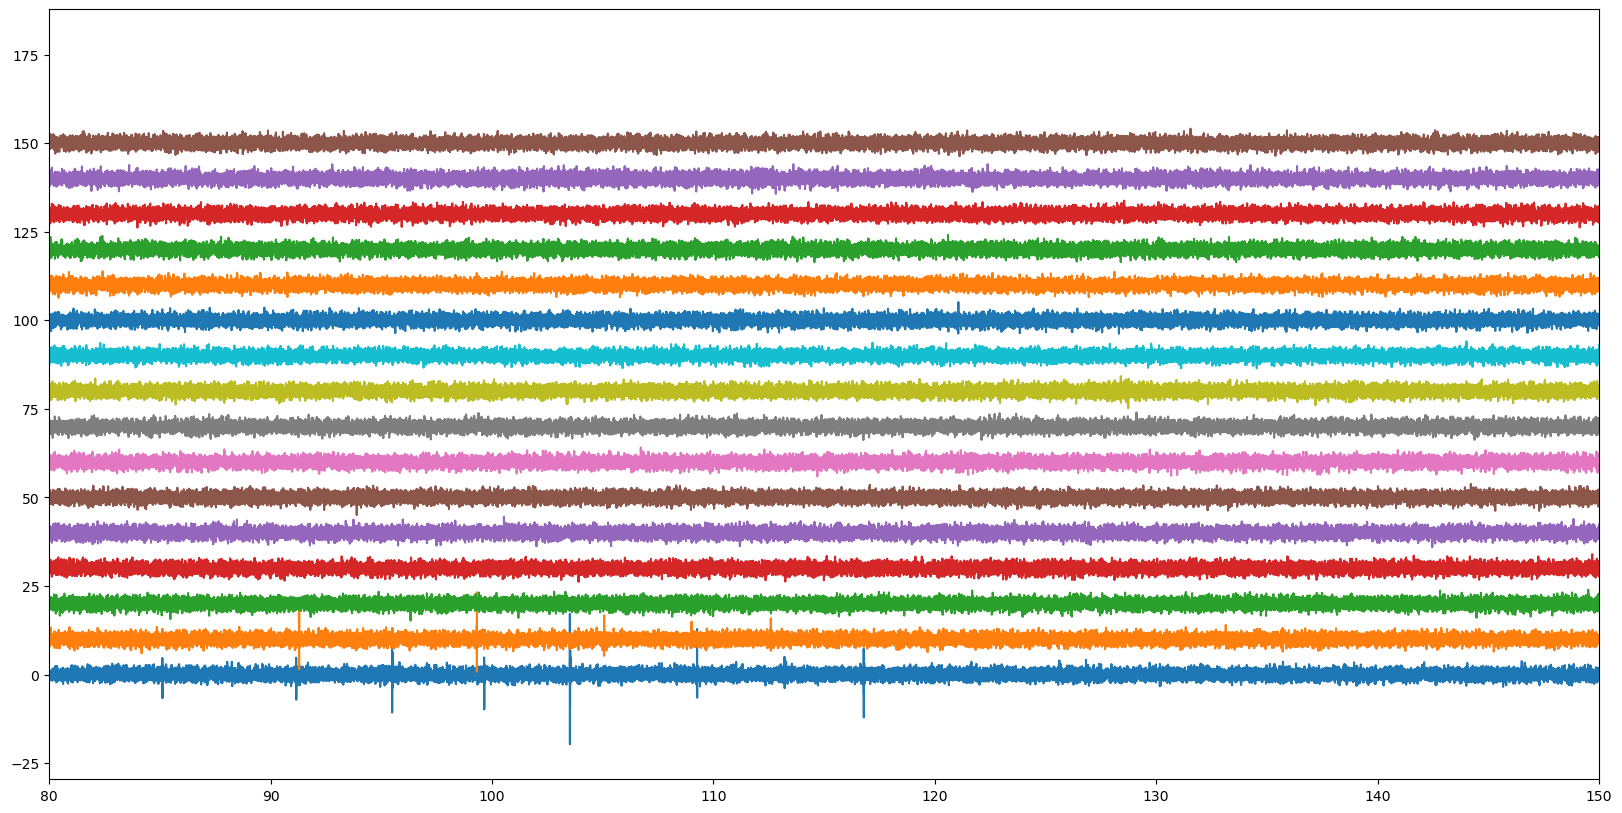

In [41]:
fig,axs = plt.subplots(figsize=(20,10))
import icewave.phone.analyse as analyse

for i,phone in enumerate(phonelist):
    data = datas[phone]
    t= data['ta']-data['ta'][0]
    y = np.abs(data['az'])
    y = (y-np.mean(y))/np.std(y)
    y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.002,flow=0.0001)
    z = np.cumsum(y_high)
    plt.plot(t,y_high+i*10)
    
plt.xlim(80,150)

In [70]:
for phone in phonelist:
    data = datas[phone]
    print(1/np.mean(np.diff(data['ta'])))

405.6327944325
406.0333923557152
405.40644007734403
403.96979482073647
406.82108088104707
406.1991405528956
406.8298159940871
405.9279858073744
404.69537602974293
405.7913736325901
403.9158462020037
403.07562063606457
403.7433704411313
405.2902443880209
408.34065323795943
406.271506070136


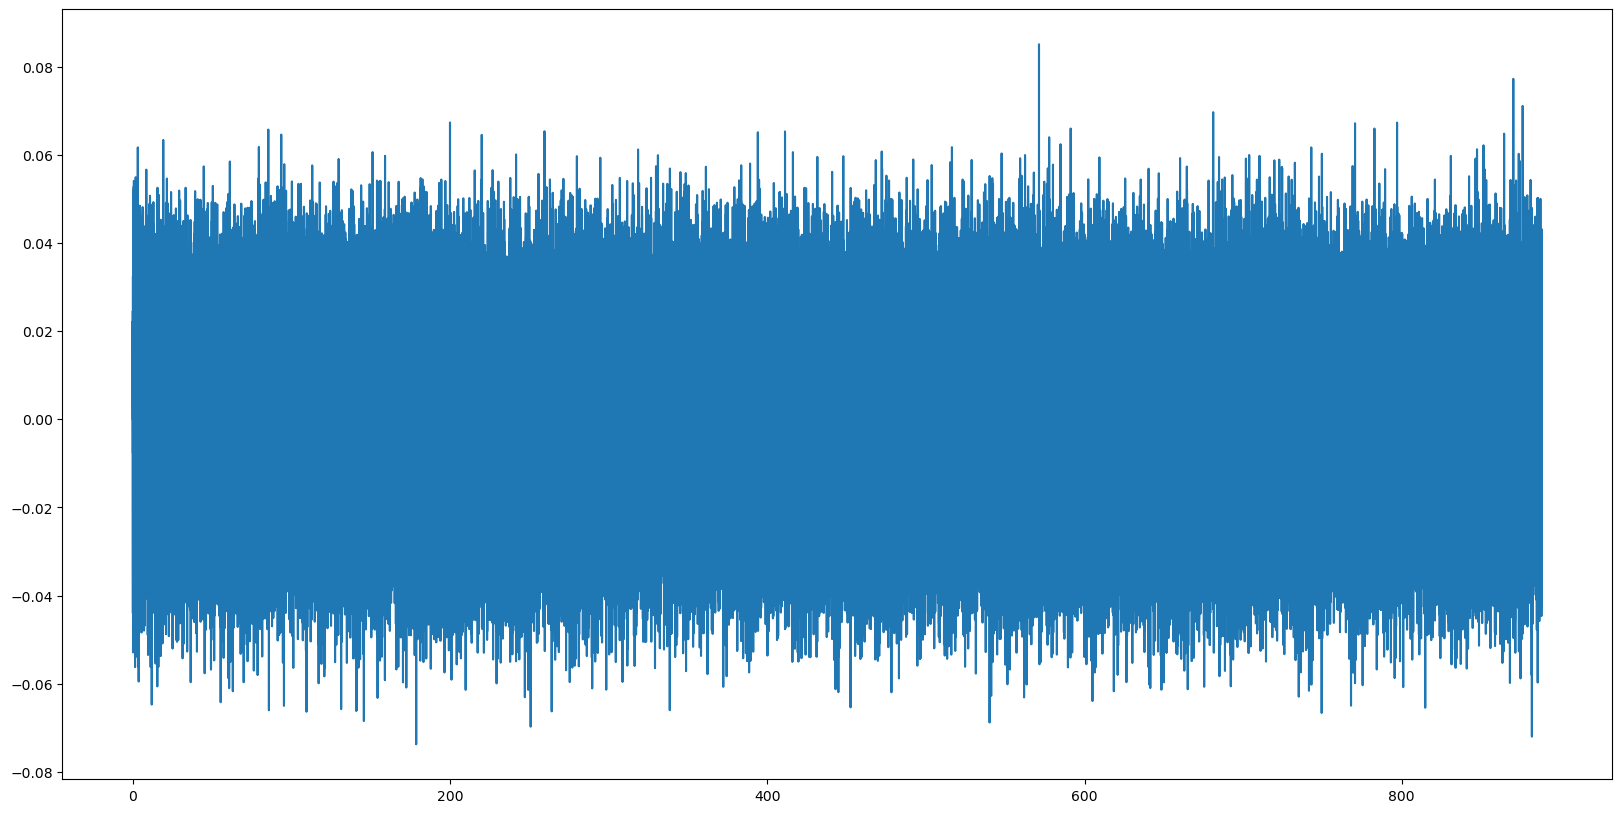

In [120]:
phone = 4
data = d
t= data['ta']-data['ta'][0]
y = data['az']
y = (y-np.mean(y))#/np.std(y)
y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.002,flow=0.0001)
z = np.cumsum(y_high)

fig,ax = plt.subplots(figsize=(20,10))
ax.plot(t,y_high)
#plt.xlim(103.4,103.6)
#plt.xlim(99.2,99.5)
#plt.xlim(100,102)
#plt.xlim([220,280])

imin = 100
imax = 140
#f,TFmoy,fmax,Amax = analyse.time_spectrum(t,y[imin:imax],nt=2000)

#plt.figure()

#plt.plot(f,TFmoy,'k')
